In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [4]:
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#Creating a dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

### Data Exploration

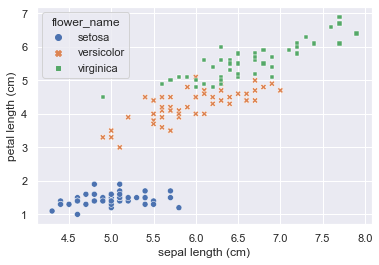

In [15]:
sns.scatterplot(x="sepal length (cm)",y="petal length (cm)",data=df,hue="flower_name",style="flower_name")

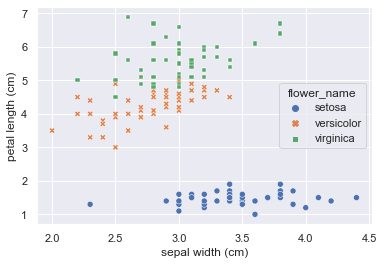

In [16]:
sns.scatterplot(x="sepal width (cm)",y="petal length (cm)",data=df,hue="flower_name",style="flower_name")

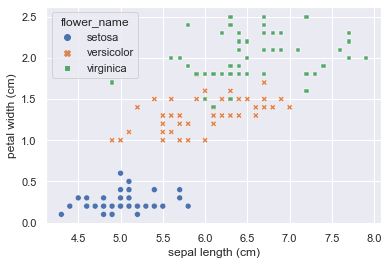

In [17]:
sns.scatterplot(x="sepal length (cm)",y="petal width (cm)",data=df,hue="flower_name",style="flower_name")

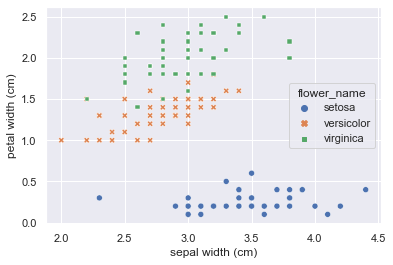

In [18]:
sns.scatterplot(x="sepal width (cm)",y="petal width (cm)",data=df,hue="flower_name",style="flower_name")

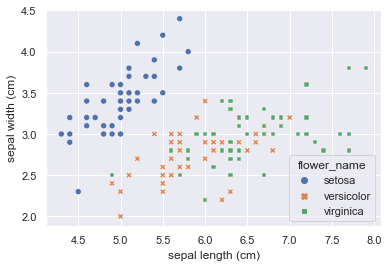

In [19]:
sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",data=df,hue="flower_name",style="flower_name")

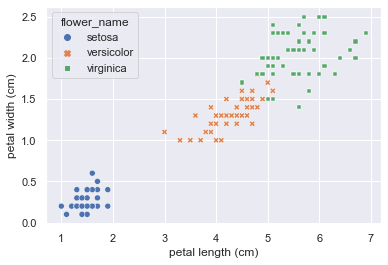

In [20]:
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",data=df,hue="flower_name",style="flower_name")

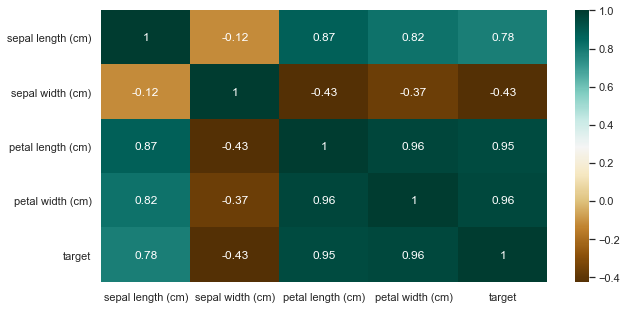

In [21]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y=df.target

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
len(X_train)

120

In [27]:
len(X_test)

30

In [28]:
from sklearn.svm import SVC
model=SVC()

In [29]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
model.score(X_test,y_test)

0.9666666666666667

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 10]], dtype=int64)

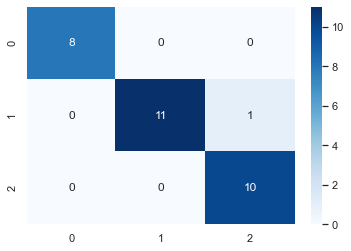

In [37]:
sns.heatmap(cm,annot=True,cmap='Blues')